# WSI LAB03 Algorytm minimax

### Miłosz Cieśla 325154 <br>

## Cele eksperymentów: 
- Przetestowanie działania algorytmu miniMax
- Porównanie jakości ruchów dla różnych głębokości przeszukiwania

## Decyzje projektowe:
- Stworzyłem klasę node aby zapewnić uniwersalność algorytmu minimax
- Jako moją heurystykę przyjąłem punktacje zależną od ilości nieprzerwanych pozycji zajętych przez gracza na planszy, które mają potencjał prowadzenia do wygranej.
- Losowanie ruchu następuje w linii zwracania wartości funkcji.


## Sprawdzenie działania algorytmu
W celu sprawdzenia implementacji wykonałem symulację 1000 rozgrywek. <br>
Graczem pierwszym będzie algorytm minimax z głębią przeszukiwań równą 5, natomiast gracz drugi będzie wykonywał losowo wybrane ruchy.

### Potrzebne importy

In [1]:
from testingFunctions import simulateMultipleGames, analyzeMovesQuality, pltMoveValues, prepareMovesTable
import pandas as pd

In [6]:
p1, p2, draws = simulateMultipleGames(1000, [False, 5, 0, 20], [True])
data = [["Player 1", p1],
        ["Player 2", p2],
        ["Draws", draws]]
columns = ["Game winner", "How many times"]
df = pd.DataFrame(data, columns=columns)
df

,Game winner,How many times
0,Player 1,984
1,Player 2,15
2,Draws,1


## Badanie wpływu głębi przeszukiwań na jakość ruchów

Pierwszym wybranym przeze mnie sposobem na zbadanie wpływu głębi na jakość ruchów, jest przeprowadzenie 100 gier w których algorytmy o różnych parametrach będą wykonywać rozgrywki przeciwko sobie.

In [4]:
game = simulateMultipleGames(100, [False, 1, 0, 30], [False, 3, 0, 30], True)
game2 = simulateMultipleGames(100, [False, 2, 0, 30], [False, 3, 0, 30], True)
game3 = simulateMultipleGames(100, [False, 4, 0, 30], [False, 3, 0, 30], True)
game4 = simulateMultipleGames(100, [False, 5, 0, 30], [False, 3, 0, 30], True)

In [6]:
data = [[1, 3, game[0], game[1], game[2]],
        [2, 3, game2[0], game2[1], game2[2]],
        [4, 3, game3[0], game3[1], game3[2]],
        [5, 3, game4[0], game4[1], game4[2]]]
columns = ["P1 Depth", "P2 Depth", "P1 Wins", "P2 Wins", "Draws"]
df = pd.DataFrame(data, columns=columns)
df

,P1 Depth,P2 Depth,P1 Wins,P2 Wins,Draws
0,1,3,74,26,0
1,2,3,81,19,0
2,4,3,81,19,0
3,5,3,85,14,1


### Uwaga do eksperymentu
Przy sporządzeniu wyników należy wziąć pod uwagę, że gracz 1 ma przewagę ponieważ zaczyna rozgrywkę. Z tego powodu w powyższych danych gracze rozpoczynali na zmianę. Poniżej załączam jak wyglądałby przypadek 1000 rozgrywek 2 botów o takich samych parametrach, w którym nie zostałby ten zabieg wykonany.

In [5]:
p1, p2, draws = simulateMultipleGames(1000, [False, 3, 0, 20], [False, 3, 0, 20])
data = [["Player 1", p1],
        ["Player 2", p2],
        ["Draws", draws]]
columns = ["Game winner", "How many times"]
df = pd.DataFrame(data, columns=columns)
df

,Game winner,How many times
0,Player 1,594
1,Player 2,404
2,Draws,2


## Przebieg wartości zwracanych przez funkcje podczas rozgrywki

Do tego eksperymentu używamy symulacji rozgrywki w której przeciwko sobie grają 2 algorytmy o takim samym parametrze głębi przeszukiwań.
Dla każdego ruchu gracza 1 oprócz minimax zwracającego ruch który ma się wykonać, działają dodatkowo algorytmy minimax pokazujące jakiej jakości ruch zostałby znaleziony w przypadku wybrania innej głębi.

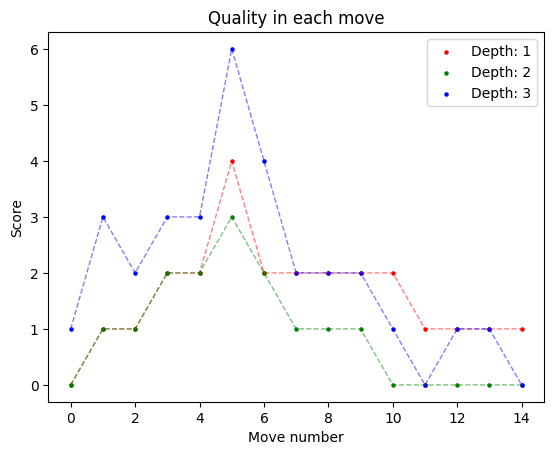

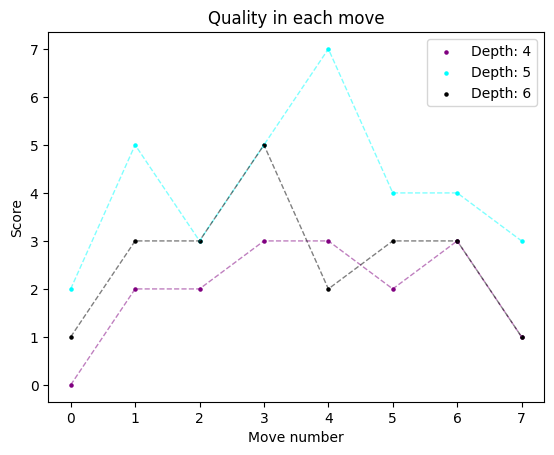

In [3]:
colors = ['red', 'green', 'blue', 'purple', 'cyan', 'black']
moveValues, movesArr = analyzeMovesQuality(6)
pltMoveValues(moveValues[:3], colors, "Quality in each move", True)
pltMoveValues(moveValues[3:], colors[3:], "Quality in each move", True, 3)

In [4]:
prepareMovesTable(movesArr)

## Wnioski z eksperymentów

Na podstawie wyżej przeprowadzonych eksperymentów dostrzegamy, że w miarę wzrostu głębokości przeszukiwań, zgodnie z naszymi oczekiwaniami, efektywność algorytmu rośnie. Mimo to, jeśli zbadamy przebieg wartości zwracanych przez miniMax z różnymi parametrami, ruchy o lepszych jakościach nie zawsze są znajdowane przez minimax z najwyższą głębią. Wynika to z tego, że algorytm z wyższym parametrem był w stanie znaleźć taki stan, że ruchy które w chwili obecnej pozwoliły z heurystyki otrzymać więcej punktów, w kolejnych ruchach przeciwnika mogłyby prowadzić dla niego do przegranej. 

## Podsumowanie